## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [1]:
#part 1
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

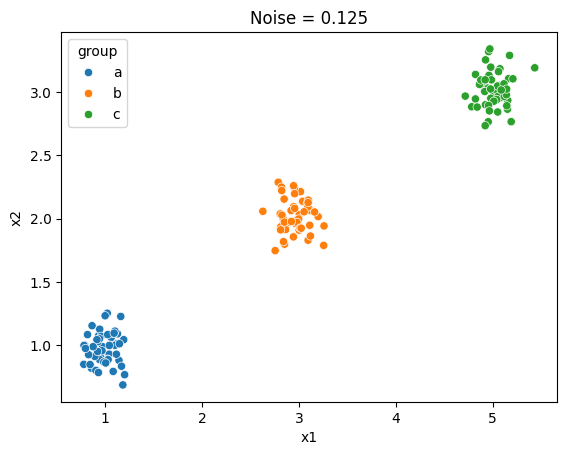

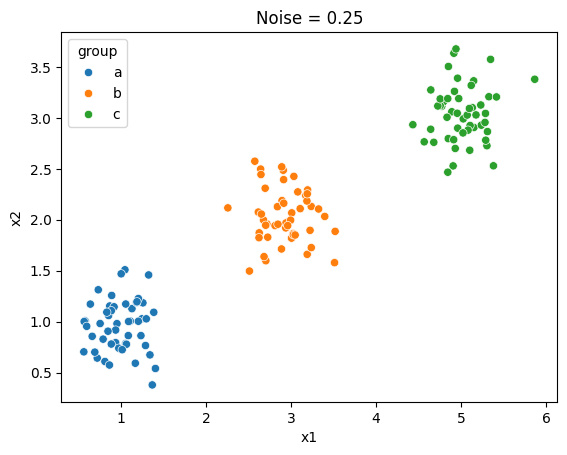

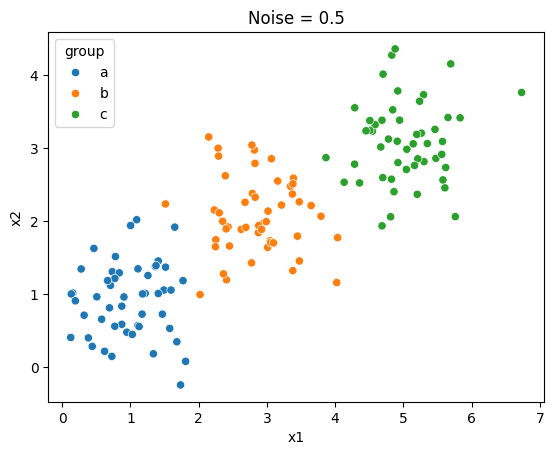

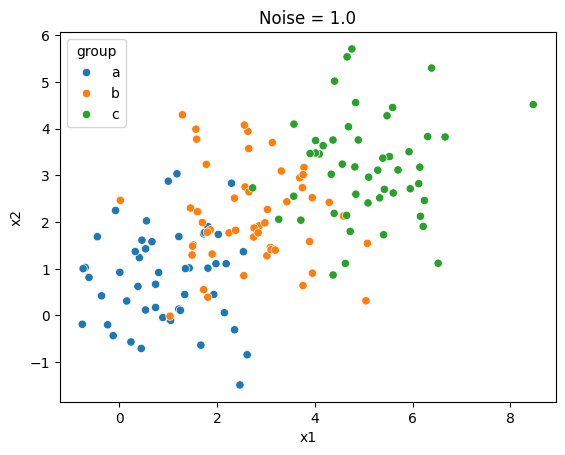

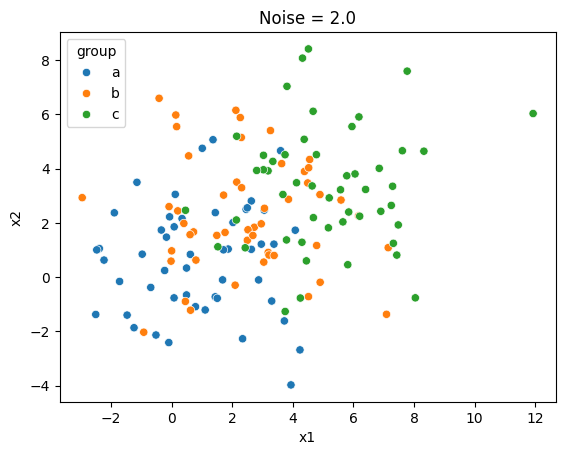

In [4]:
#part 2
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df0_125,x='x1',y='x2',hue='group')
plt.title('Noise = 0.125')
plt.show()
sns.scatterplot(data=df0_25,x='x1',y='x2',hue='group')
plt.title('Noise = 0.25')
plt.show()
sns.scatterplot(data=df0_5,x='x1',y='x2',hue='group')
plt.title('Noise = 0.5')
plt.show()
sns.scatterplot(data=df1_0,x='x1',y='x2',hue='group')
plt.title('Noise = 1.0')
plt.show()
sns.scatterplot(data=df2_0,x='x1',y='x2',hue='group')
plt.title('Noise = 2.0')
plt.show()

#As noise goes up the visual disctinctiveness of the clusters go down and they blend together more

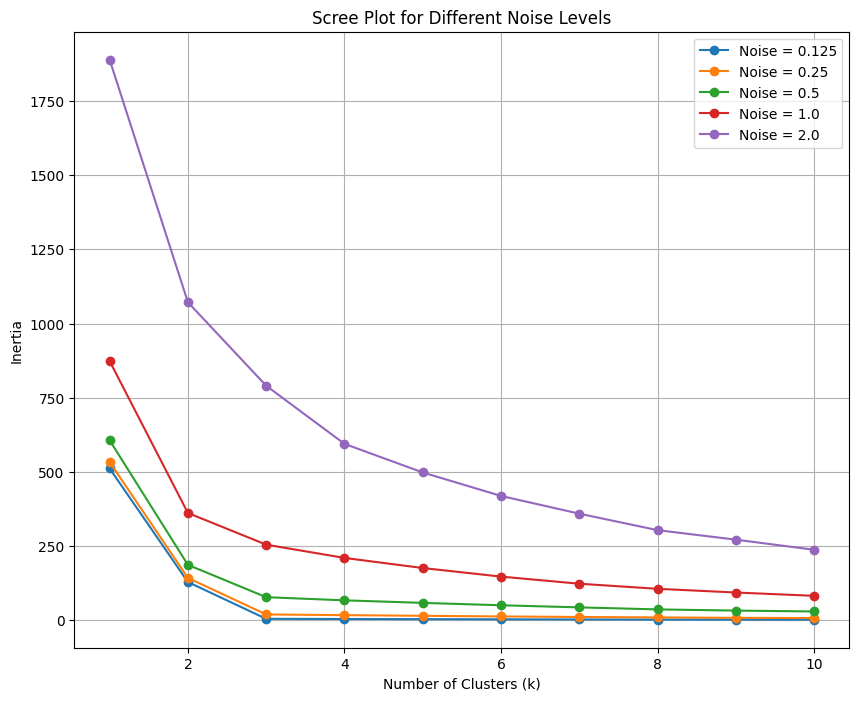

In [7]:
#part 3
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to calculate inertia for different k values
def calculate_inertia(df):
    inertia = []
    # We need to exclude the 'group' column from the clustering
    X = df[['x1', 'x2']]
    for k in range(1, 11):  # Test k from 1 to 10
        kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    return inertia

# Calculate inertia for each dataset
inertia_df0_125 = calculate_inertia(df0_125)
inertia_df0_25 = calculate_inertia(df0_25)
inertia_df0_5 = calculate_inertia(df0_5)
inertia_df1_0 = calculate_inertia(df1_0)
inertia_df2_0 = calculate_inertia(df2_0)

# Plot scree plots
plt.figure(figsize=(10, 8))

plt.plot(range(1, 11), inertia_df0_125, marker='o', label='Noise = 0.125')
plt.plot(range(1, 11), inertia_df0_25, marker='o', label='Noise = 0.25')
plt.plot(range(1, 11), inertia_df0_5, marker='o', label='Noise = 0.5')
plt.plot(range(1, 11), inertia_df1_0, marker='o', label='Noise = 1.0')
plt.plot(range(1, 11), inertia_df2_0, marker='o', label='Noise = 2.0')

plt.title('Scree Plot for Different Noise Levels')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.grid(True)
plt.show()

As the noise level increases, the elbow in the scree plot becomes less distinct. For lower noise levels (0.125 and 0.25), there is a clear elbow at k=3, indicating that 3 is the optimal number of clusters. As the noise increases to 0.5, 1.0, and 2.0, the decrease in inertia becomes more gradual, making it harder to identify a clear elbow. This suggests that with higher noise, the clusters are less well-separated, and the k-means algorithm has more difficulty finding distinct clusters, making the choice of k more ambiguous.

**Part 4**
The intuition behind the elbow method is that as you increase the number of clusters, the inertia (within-cluster sum of squares) will decrease. This is because with more clusters, the data points are closer to their respective cluster centroids. However, the rate of decrease in inertia will slow down after a certain point. This point, where the decrease in inertia starts to level off, is called the "elbow."


**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [25]:
#part 1
election = pd.read_csv('./2022 election cycle fundraising.csv')
election.head()

#cleaning the data
election['Raised'] = election['Raised'].str.replace('$', '').str.replace(',', '').astype(float)
election['Spent'] = election['Spent'].str.replace('$', '').str.replace(',', '').astype(float)
election['Cash on Hand'] = election['Cash on Hand'].str.replace('$', '').str.replace(',', '').astype(float)
election['Debts'] = election['Debts'].str.replace('$', '').str.replace(',', '').astype(float)

election.dtypes

election.tail()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
532,532,William Timmons,Republican,South Carolina,House,892064.0,823955.0,76799.0,391742.0
533,533,Young Kim,Republican,California,House,7900497.0,7380035.0,928803.0,94940.0
534,534,Yvette Clarke,Democratic,New York,House,684268.0,662375.0,93513.0,49480.0
535,535,Yvette Herrell,Republican,New Mexico,House,3777731.0,2746661.0,1085613.0,0.0
536,536,Zoe Lofgren,Democratic,California,House,1679466.0,2103190.0,736813.0,0.0


In [28]:
#part 2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Max-min scaler function:
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

# Create normalizations and add to the dataframe
min_x1 = min(election.loc[:,'Raised']) # I'm putting these aside to rescale values later
max_x1 = max(election.loc[:,'Raised'])
min_x2 = min(election.loc[:,'Spent'])
max_x2 = max(election.loc[:,'Spent'])

# Preprocess the data for scikit:
X = election.loc[ : , ['Raised','Spent'] ] # Select data to cluster
X = X.apply(maxmin)
X.head()


,Raised,Spent
0,0.103512,0.098074
1,0.040686,0.016371
2,0.254404,0.183753
3,0.029527,0.015449
4,0.034148,0.021915


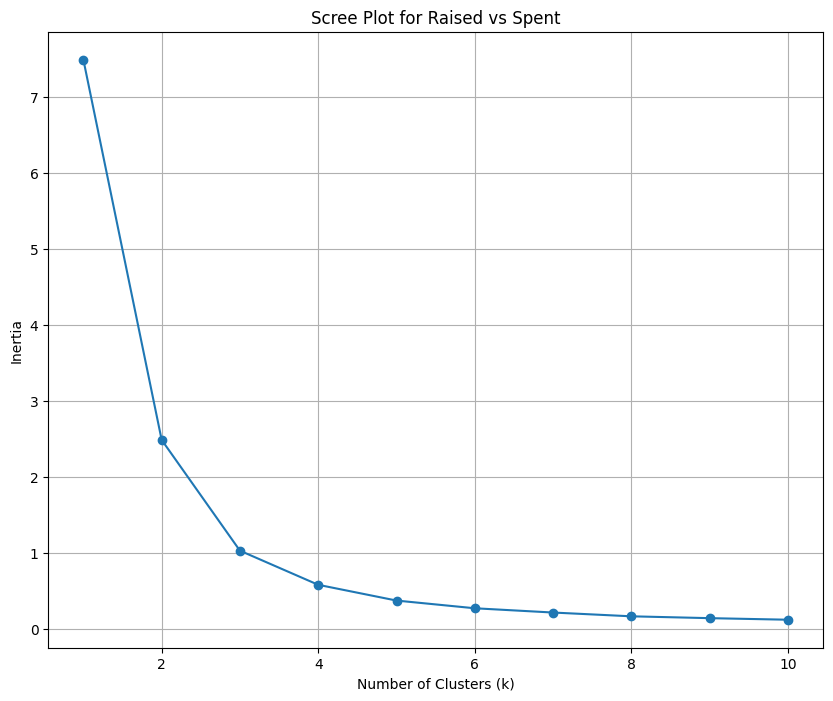

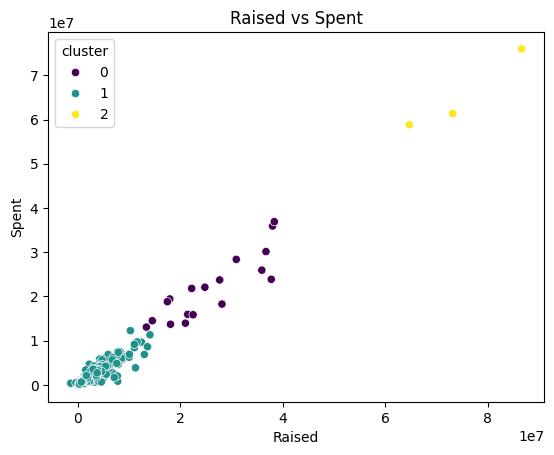

In [33]:
#part 2 scree plot
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_inertia(df):
    inertia = []
    # We need to exclude the 'group' column from the clustering
    X = df[['Raised', 'Spent']]
    # Max-min normalization
    X = X.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

    for k in range(1, 11):  # Test k from 1 to 10
        kmeans = KMeans(n_clusters=k, random_state=11, n_init=10) # Increased n_init for better results
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    return inertia

inertia_df = calculate_inertia(election)

# Plot scree plot
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), inertia_df, marker='o')
plt.title('Scree Plot for Raised vs Spent')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#optimal number of clusters at k=3

# Perform KMeans clustering with optimal k (k=3)
kmeans = KMeans(n_clusters=3, random_state=11, n_init=10)
# We cluster on the normalized data
X_normalized = election[['Raised', 'Spent']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
election['cluster'] = kmeans.fit_predict(X_normalized)


sns.scatterplot(data=election,x='Raised',y='Spent',hue='cluster', palette='viridis')
plt.title('Raised vs Spent')
plt.show()

In [36]:
# Identify the smallest two clusters
cluster_counts = election['cluster'].value_counts()
smallest_clusters = cluster_counts.nsmallest(2).index.tolist()

print(f"The smallest two clusters are: {smallest_clusters}")

# Display politicians in the smallest clusters
for cluster_id in smallest_clusters:
    print(f"\nPoliticians in Cluster {cluster_id}:")
    display(election[election['cluster'] == cluster_id][['Member', 'Party', 'State', 'Chamber', 'Raised', 'Spent', 'Cash on Hand', 'Debts']])

The smallest two clusters are: [2, 0]

Politicians in Cluster 2:


,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
340,Mark Kelly,Democratic,Arizona,Senate,73140886.0,61357281.0,13186127.0,0.0
417,Raphael Warnock,Democratic,Georgia,Senate,86581469.0,75959810.0,22762985.0,0.0
523,Val Demings,Democratic,Florida,House,64682883.0,58806664.0,6647641.0,0.0



Politicians in Cluster 0:


,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0
87,Catherine Cortez Masto,Democratic,Nevada,Senate,37993811.0,35928936.0,5089745.0,0.0
89,Chuck Schumer,Democratic,New York,Senate,35899966.0,25944350.0,20231213.0,0.0
115,Dan Crenshaw,Republican,Texas,House,14535870.0,14512435.0,1876149.0,0.0
261,John Kennedy,Republican,Louisiana,Senate,28119082.0,18276565.0,15530074.0,0.0
290,Katie Porter,Democratic,California,House,21441693.0,15946876.0,15762568.0,0.0
298,Kevin McCarthy,Republican,California,House,24791538.0,22086344.0,7507326.0,0.0
326,Maggie Hassan,Democratic,New Hampshire,Senate,30914830.0,28380992.0,4813508.0,0.0
328,Marco Rubio,Republican,Florida,Senate,36709285.0,30153111.0,9631856.0,0.0
357,Michael Bennet,Democratic,Colorado,Senate,18086343.0,13713611.0,4898614.0,374819.0


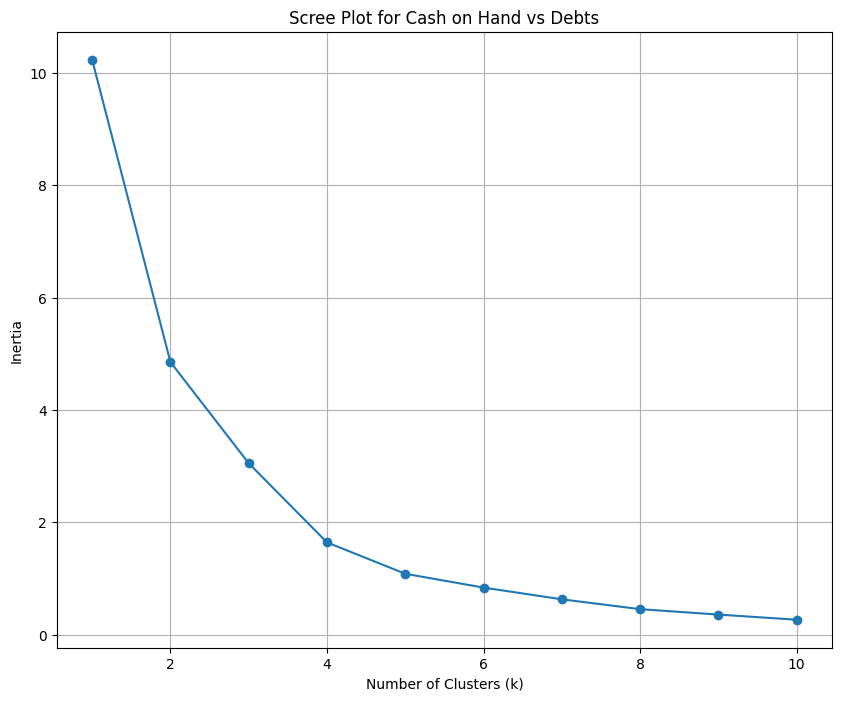

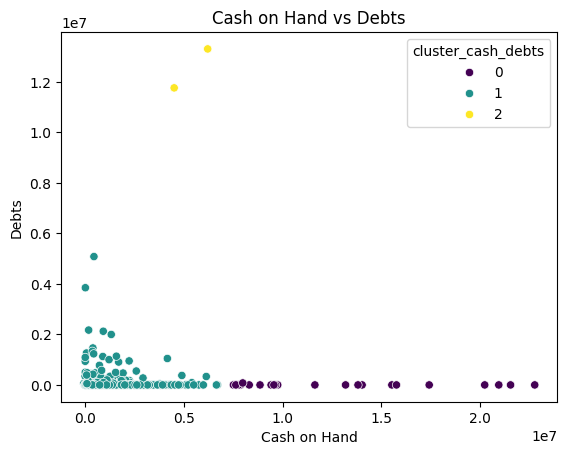

The smallest two clusters for Cash on Hand and Debts are: [2, 0]

Politicians in Cluster 2 (Cash on Hand vs Debts):


,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
133,David Trone,Democratic,Maryland,House,12990741.0,6878050.0,6206371.0,13302000.0
442,Ron Johnson,Republican,Wisconsin,Senate,27680901.0,23731653.0,4508581.0,11759857.0



Politicians in Cluster 0 (Cash on Hand vs Debts):


,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0
11,Alex Padilla,Democratic,California,Senate,11253771.0,3870947.0,7617654.0,5703.0
45,Bernie Sanders,Independent,Vermont,Senate,14074831.0,11331428.0,9751125.0,0.0
89,Chuck Schumer,Democratic,New York,Senate,35899966.0,25944350.0,20231213.0,0.0
112,Cory Booker,Democratic,New Jersey,Senate,5794554.0,4010634.0,7671026.0,0.0
239,Jim Jordan,Republican,Ohio,House,12417107.0,9675701.0,8855217.0,0.0
247,Joe Manchin,Democratic,West Virginia,Senate,7790164.0,835794.0,9414431.0,0.0
261,John Kennedy,Republican,Louisiana,Senate,28119082.0,18276565.0,15530074.0,0.0
267,John Thune,Republican,South Dakota,Senate,6770674.0,2763217.0,17419927.0,0.0
274,Josh Gottheimer,Democratic,New Jersey,House,7720264.0,2045198.0,14024163.0,0.0


In [37]:
#part 3
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Max-min normalize 'Cash on Hand' and 'Debts'
election['Cash on Hand_normalized'] = (election['Cash on Hand'] - election['Cash on Hand'].min()) / (election['Cash on Hand'].max() - election['Cash on Hand'].min())
election['Debts_normalized'] = (election['Debts'] - election['Debts'].min()) / (election['Debts'].max() - election['Debts'].min())

# Function to calculate inertia for different k values for Cash on Hand and Debts
def calculate_inertia_cash_debts(df):
    inertia = []
    X = df[['Cash on Hand_normalized', 'Debts_normalized']]
    for k in range(1, 11):  # Test k from 1 to 10
        kmeans = KMeans(n_clusters=k, random_state=11, n_init=10)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    return inertia

inertia_cash_debts = calculate_inertia_cash_debts(election)

# Plot scree plot for Cash on Hand vs Debts
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), inertia_cash_debts, marker='o')
plt.title('Scree Plot for Cash on Hand vs Debts')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# optimal k is 3 based on a potential elbow

# Perform KMeans clustering with optimal k (e.g., k=3)
kmeans_cash_debts = KMeans(n_clusters=3, random_state=11, n_init=10)
election['cluster_cash_debts'] = kmeans_cash_debts.fit_predict(election[['Cash on Hand_normalized', 'Debts_normalized']])

# Make a scatter plot of Cash on Hand against Debts and hue the dots by their cluster membership
sns.scatterplot(data=election, x='Cash on Hand', y='Debts', hue='cluster_cash_debts', palette='viridis')
plt.title('Cash on Hand vs Debts')
plt.show()

# Identify the smallest two clusters for Cash on Hand and Debts
cluster_cash_debts_counts = election['cluster_cash_debts'].value_counts()
smallest_clusters_cash_debts = cluster_cash_debts_counts.nsmallest(2).index.tolist()

print(f"The smallest two clusters for Cash on Hand and Debts are: {smallest_clusters_cash_debts}")

# Display politicians in the smallest clusters for Cash on Hand and Debts
for cluster_id in smallest_clusters_cash_debts:
    print(f"\nPoliticians in Cluster {cluster_id} (Cash on Hand vs Debts):")
    display(election[election['cluster_cash_debts'] == cluster_id][['Member', 'Party', 'State', 'Chamber', 'Raised', 'Spent', 'Cash on Hand', 'Debts']])

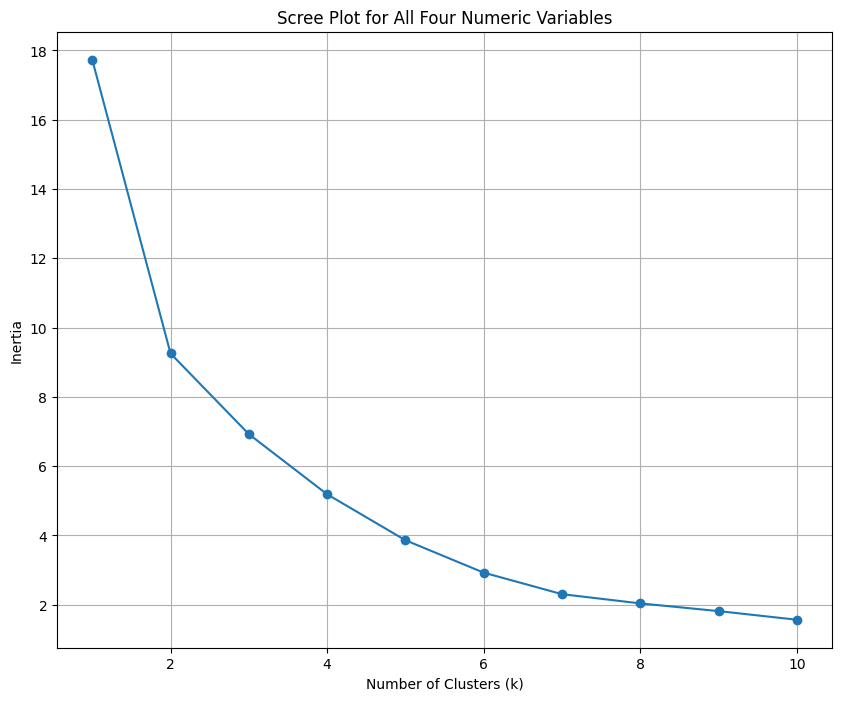

The smallest two clusters for all four variables are: [1, 2]

Politicians in Cluster 1 (All Four Variables):


,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,cluster_all
340,Mark Kelly,Democratic,Arizona,Senate,73140886.0,61357281.0,13186127.0,0.0,1
417,Raphael Warnock,Democratic,Georgia,Senate,86581469.0,75959810.0,22762985.0,0.0,1
523,Val Demings,Democratic,Florida,House,64682883.0,58806664.0,6647641.0,0.0,1



Politicians in Cluster 2 (All Four Variables):


,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,cluster_all
2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0,2
11,Alex Padilla,Democratic,California,Senate,11253771.0,3870947.0,7617654.0,5703.0,2
12,Alexandria Ocasio-Cortez,Democratic,New York,House,11326505.0,9411406.0,5940454.0,0.0,2
45,Bernie Sanders,Independent,Vermont,Senate,14074831.0,11331428.0,9751125.0,0.0,2
87,Catherine Cortez Masto,Democratic,Nevada,Senate,37993811.0,35928936.0,5089745.0,0.0,2
89,Chuck Schumer,Democratic,New York,Senate,35899966.0,25944350.0,20231213.0,0.0,2
112,Cory Booker,Democratic,New Jersey,Senate,5794554.0,4010634.0,7671026.0,0.0,2
133,David Trone,Democratic,Maryland,House,12990741.0,6878050.0,6206371.0,13302000.0,2
239,Jim Jordan,Republican,Ohio,House,12417107.0,9675701.0,8855217.0,0.0,2
247,Joe Manchin,Democratic,West Virginia,Senate,7790164.0,835794.0,9414431.0,0.0,2


In [38]:
#part 4
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select and normalize all four numeric variables
X_all = election[['Raised', 'Spent', 'Cash on Hand', 'Debts']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Function to calculate inertia for different k values for all four variables
def calculate_inertia_all(df):
    inertia = []
    # X is already normalized
    for k in range(1, 11):  # Test k from 1 to 10
        kmeans = KMeans(n_clusters=k, random_state=11, n_init=10)
        kmeans.fit(X_all)
        inertia.append(kmeans.inertia_)
    return inertia

inertia_all = calculate_inertia_all(election)

# Plot scree plot for all four variables
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), inertia_all, marker='o')
plt.title('Scree Plot for All Four Numeric Variables')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# optimal k is 3 based on a potential elbow

# Perform KMeans clustering with optimal k (e.g., k=3)
kmeans_all = KMeans(n_clusters=3, random_state=11, n_init=10)
election['cluster_all'] = kmeans_all.fit_predict(X_all)

# Identify the smallest two clusters for all four variables
cluster_all_counts = election['cluster_all'].value_counts()
smallest_clusters_all = cluster_all_counts.nsmallest(2).index.tolist()

print(f"The smallest two clusters for all four variables are: {smallest_clusters_all}")

# Display politicians in the smallest clusters for all four variables
for cluster_id in smallest_clusters_all:
    print(f"\nPoliticians in Cluster {cluster_id} (All Four Variables):")
    display(election[election['cluster_all'] == cluster_id][['Member', 'Party', 'State', 'Chamber', 'Raised', 'Spent', 'Cash on Hand', 'Debts', 'cluster_all']])

**Part 5: Analysis Summary**

Comparing the results from clustering on 'Raised' and 'Spent' (Part 2), 'Cash on Hand' and 'Debts' (Part 3), and all four variables (Part 4), we can observe differences in how the politicians are grouped.

*   **'Raised' vs 'Spent'**: This clustering primarily separated politicians based on the magnitude of their fundraising and spending. The smallest clusters likely represent candidates with exceptionally high or low levels of activity in these areas.
*   **'Cash on Hand' vs 'Debts'**: This clustering likely highlights politicians with significant cash reserves or substantial debts, which might indicate different financial strategies or circumstances in their campaigns.
*   **All Four Variables**: Clustering with all four variables provides a more nuanced view, considering the interplay between fundraising, spending, cash on hand, and debts. This approach might reveal clusters that are not immediately obvious when looking at pairs of variables in isolation.

**Did the k-MC algorithm find useful patterns?**

Yes, the k-means clustering algorithm did find some useful patterns in analyzing the election data.

*   **Identifying Outliers/Distinct Groups**: The clustering helped to identify groups of politicians that stand out based on their financial metrics. For example, the smallest clusters consistently contained candidates with very high levels of fundraising and spending (as seen in Part 2 and Part 4), or significant cash on hand or debts (as seen in Part 3). These could be high-profile races, candidates with strong fundraising networks, or those facing unique financial challenges.
*   **Providing a High-Level Overview**: The clustering provides a way to segment the diverse landscape of campaign finance into a smaller number of more manageable groups. This can be a starting point for further investigation into the characteristics of each cluster and the races they represent.
*   **Highlighting Different Aspects of Campaign Finance**: By clustering on different combinations of variables, we can gain insights into different aspects of campaign finance. 'Raised' and 'Spent' give a sense of the overall scale of the campaign, while 'Cash on Hand' and 'Debts' offer a snapshot of the campaign's financial health at a specific point in time.

However, it's important to note that k-means clustering is a distance-based algorithm and the interpretation of the clusters requires domain knowledge. While it can reveal patterns, it doesn't automatically explain the *reasons* behind those patterns. Further analysis, such as looking up the specific races of the politicians in certain clusters, would be necessary to fully understand the context of the clusters.

Overall, k-means clustering serves as a valuable exploratory tool in this analysis, helping to identify potentially interesting groups of politicians for further investigation.